# 6. Learning Theory

## 6.1 Bias/variance tradeoff

ucas ver.

### 6.1.1 Intro

如图所示展示了 *underfit*, *just right*, *overfit* 的三种情况。

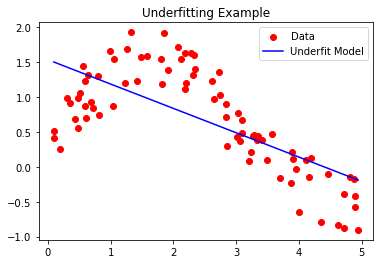

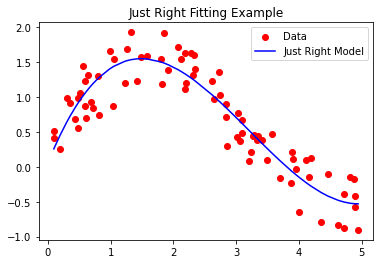

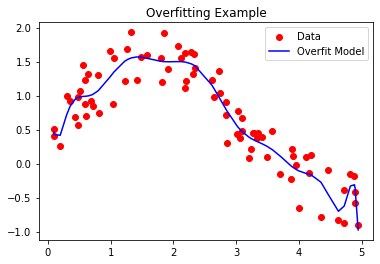

In [ ]:
# 拟合与过拟合

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 创建示例数据集
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(80)

# 1. 欠拟合（Underfitting）

# 使用线性回归模型进行拟合
model_underfit = LinearRegression()
model_underfit.fit(X, y)

# 绘制图像
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, model_underfit.predict(X), color='blue', label='Underfit Model')
plt.title('Underfitting Example')
plt.legend()
plt.show()

# 2. 拟合适当（Just Right）

degree = 3  # 多项式次数

# 使用多项式回归模型进行拟合
model_just_right = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_just_right.fit(X, y)

# 绘制图像
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, model_just_right.predict(X), color='blue', label='Just Right Model')
plt.title('Just Right Fitting Example')
plt.legend()
plt.show()

# 3. 过拟合（Overfitting）

degree = 15  # 多项式次数

# 使用高次多项式回归模型进行拟合
model_overfit = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_overfit.fit(X, y)

# 绘制图像
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, model_overfit.predict(X), color='blue', label='Overfit Model')
plt.title('Overfitting Example')
plt.legend()
plt.show()


#### 插值 Interpolation

- 插值在只考虑训练集时，是最“完美”的拟合方法。例如Lagrange插值等

- 插值的问题
  1. 严重不稳定：由于插值要求经过每个点，因此对于每个点的微小扰动都会导致插值结果的巨大变化（因此对于噪声也是不稳健的）
  2. 系数过大：在拟合结束后，对于新的数据点，其数值也是计算不稳定的

**OVERFIT!**

### 6.1.2 No-Free-Lunch Theorem

记$L$为loss function，模型为$f$，则有记号$L(f(x),y)$

- 在样本角度，empirically我们能做到的最优模型就是最小化损失函数，即：
    $$\begin{aligned}
        C_1[f_X] &= \frac1n \sum_{k=1}^n L(f(x_k),y_k) \\
        f_X(x) &= \arg\min_f C_1[f]
        \end{aligned}$$

- 在总体角度，theoretically我们能做到的最小损失为：
   $$\begin{aligned}
        C_2[f_X] &= \int_{Xxy} L(f(x),y) p(x,y) \mathrm{d}x \mathrm{d}y \\
        f^*_{\text{opt}}(x) &= \arg\min_f C_2[f]
        \end{aligned}$$
    - 而这里的分布$p(x,y)$是上帝视角的，我们只能通过样本来近似它；而这里的采样一定是存在偏差的(*Sample Bias*)

呈上，我们有：
$$\begin{aligned}
f(x)-f^*(x) &= \left(f(x)-f_X(x)\right) + \left(f_X(x)-f^*(x)\right) \\
&= \text{estimation error} + \text{approximation error}
\end{aligned}$$

Estimation error是由于样本有限，而导致的对于总体分布的估计误差；而approximation error是数据自身带来的误差，例如噪声等。

而实际上，Approximation error是更大的问题。

**NO FREE LUNCH**


### 6.1.3 Bias/Variance Tradeoff

$$\begin{aligned}
C_2[f_X] &= \int_{Xxy} L(f_X(x),y) p(x,y) \mathrm{d}x \mathrm{d}y \\
E_X\left[C_2[f_X]\right] &= E_X\left[\int_{Xxy} L(f_X(x),y) p(x,y) \mathrm{d}x \mathrm{d}y\right] \\
&= E_X\left(E_{xy}\left[L(f_X(x),y)\right]\right) \\
&  \cdots\\
&= \sigma^2 + Var(E_X(f_X(x))) + E(E_X(f_X(x)|X)-f^*(x))^2
\end{aligned}$$

这个就是 *Bias-Variance Tradeoff*. 

因此在这里，我们希望通过牺牲一部分的模型复杂度，从而降低模型的方差，从而降低总体误差。